# Deploying a RAG-based chatbot on AWS using Cloud9

This notebook contains a step-by-step instruction on deploying a RAG-based chatbot on AWS using Cloud9 environment. This deployment allows testing different large language models fine-tuned by Retrieval Augmented Generation (RAG) architecture. To learn more about how RAG works, please visit [What is RAG?](https://aws.amazon.com/what-is/retrieval-augmented-generation/) by AWS.

The instruction will be splitted it 3 parts:
1. The pre-requisites for the deployment
2. Deployment instructions and commands
3. Difference between specific ways of deployment

The content of this notebook is inspired by and is an addition to [AWS GenAI Chatbot Deployment Instruction](https://github.com/aws-samples/aws-genai-llm-chatbot?tab=readme-ov-file) and is primarily created to help engineer avoid common problems I experienced in the deployment process. 

## 1. Pre-requisites

There are three main pre-requisites for the deployment. 
1. You should have an AWS account. If you are a root user, you can directly proceed to the next steps. If you are an IAM user, make sure you have Admin access or you might run into permission issues which will lead to a failed deployment.
2. You should have enough credits to cover the cost of the deployment and usage of chatbot. The cost depends on the duration of your usage and the resources you use. 
3. You should have access to Bedrock models. 

For the third pre-requisite, if you don't know how to get access to Bedrock models, follow the steps below. If you already have access to Bedrock models, ignore this step. **Requesting model access in Amazon Bedrock does not cost anything.**
 - Log in to your AWS account. 
 - Once on the AWS homepage, search for Amazon Bedrock on the search bar on top of the page. 
 
 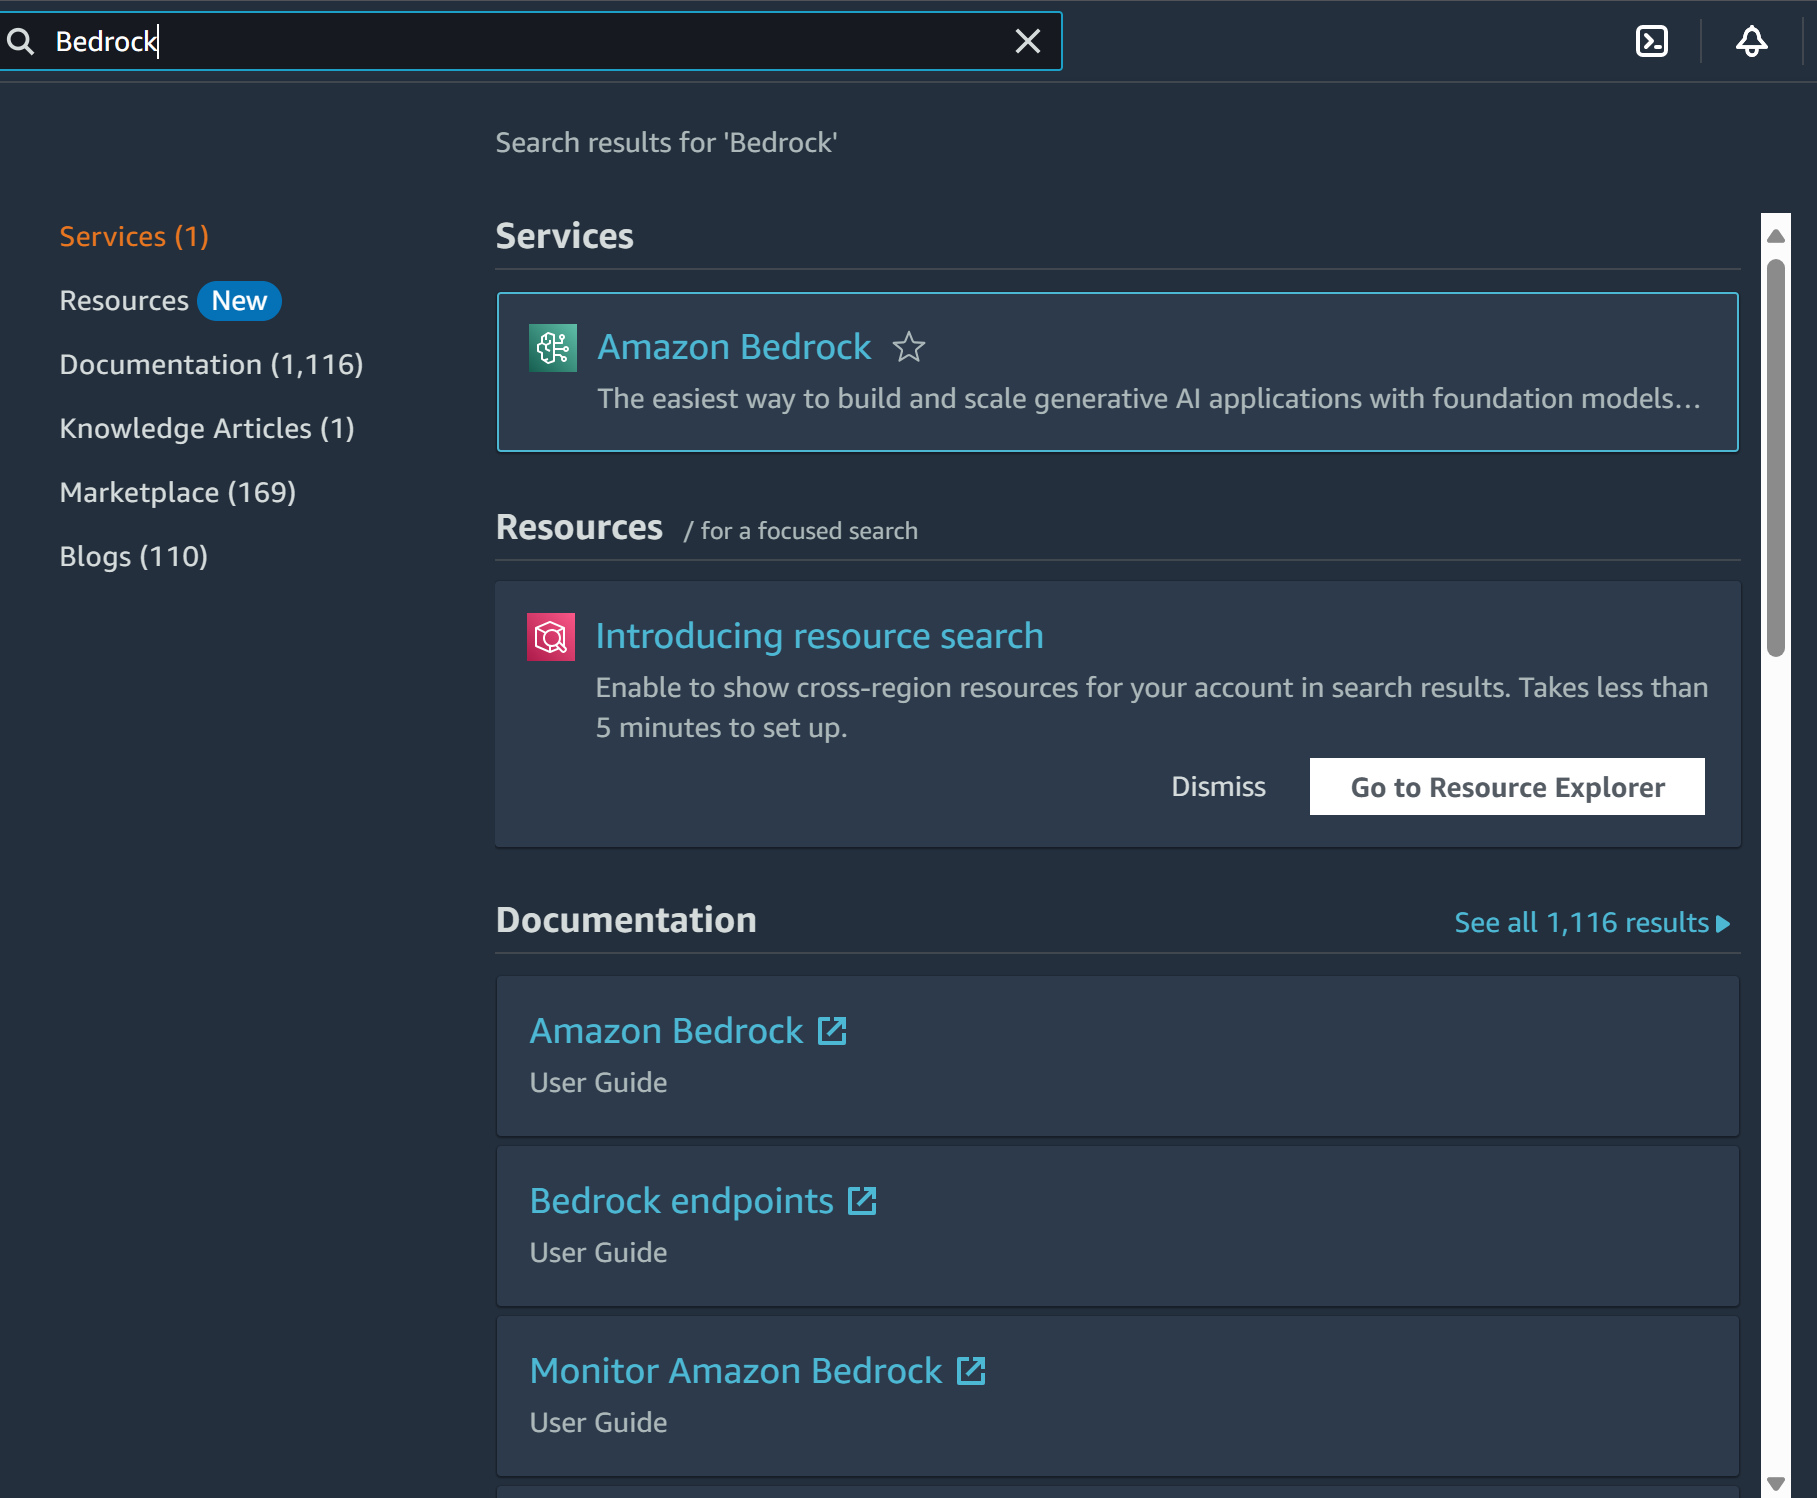
 
 - Then, navigate to `Model Access` page. 
 
 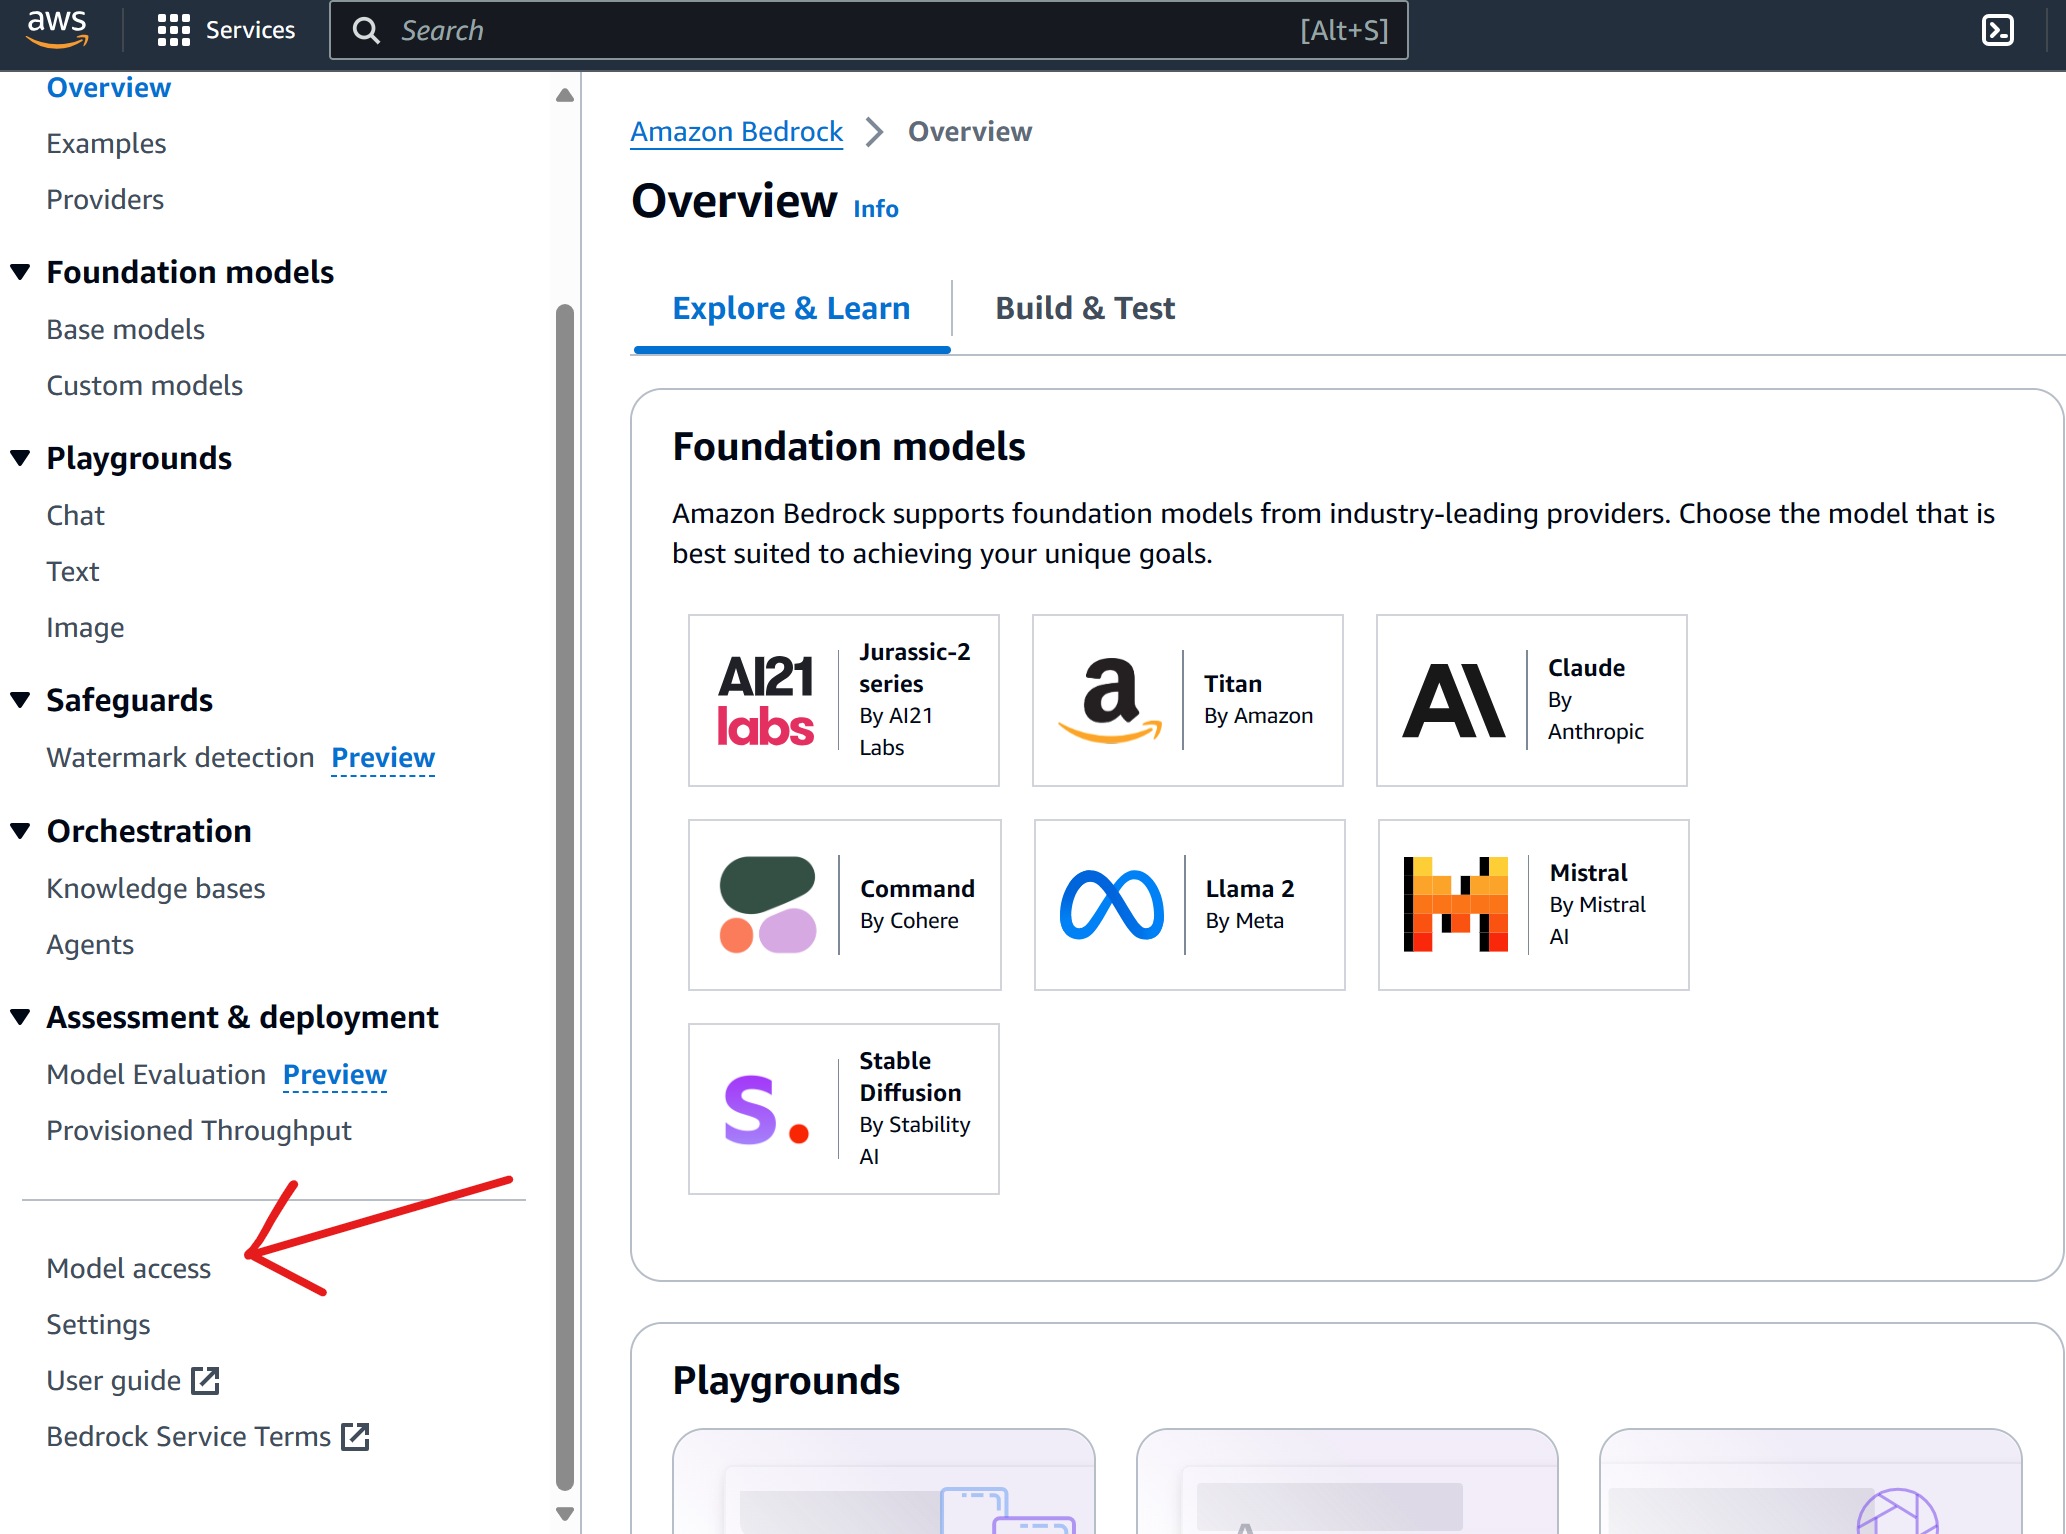


 - Click `Manage model access`. 
 
 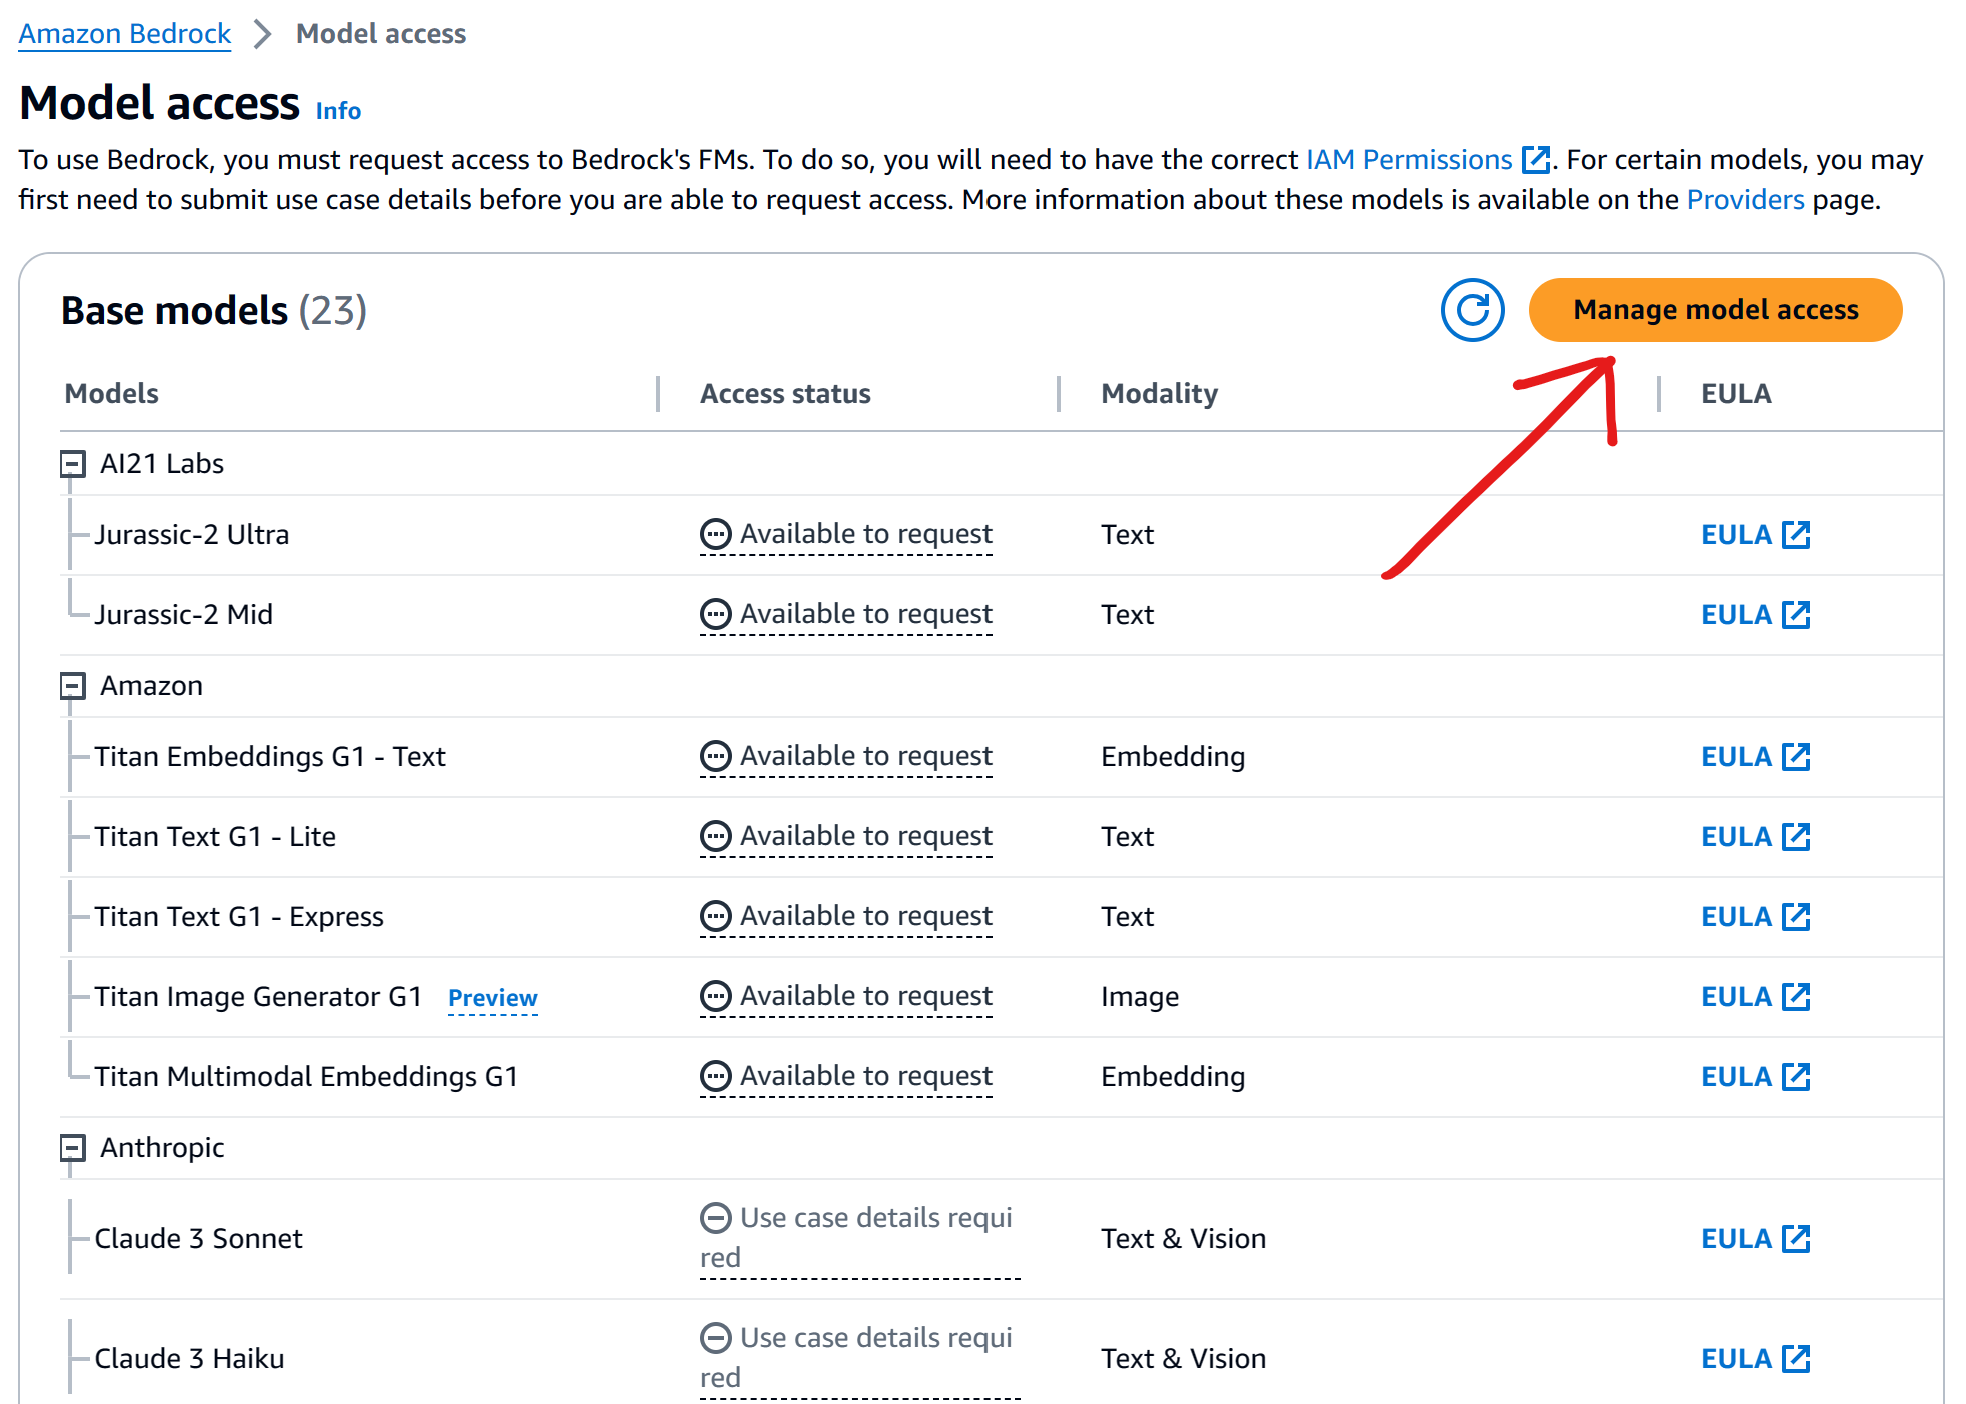


 - Select all of the models, the scroll down to the bottom of the page and click `Request Model Access`. 
 
 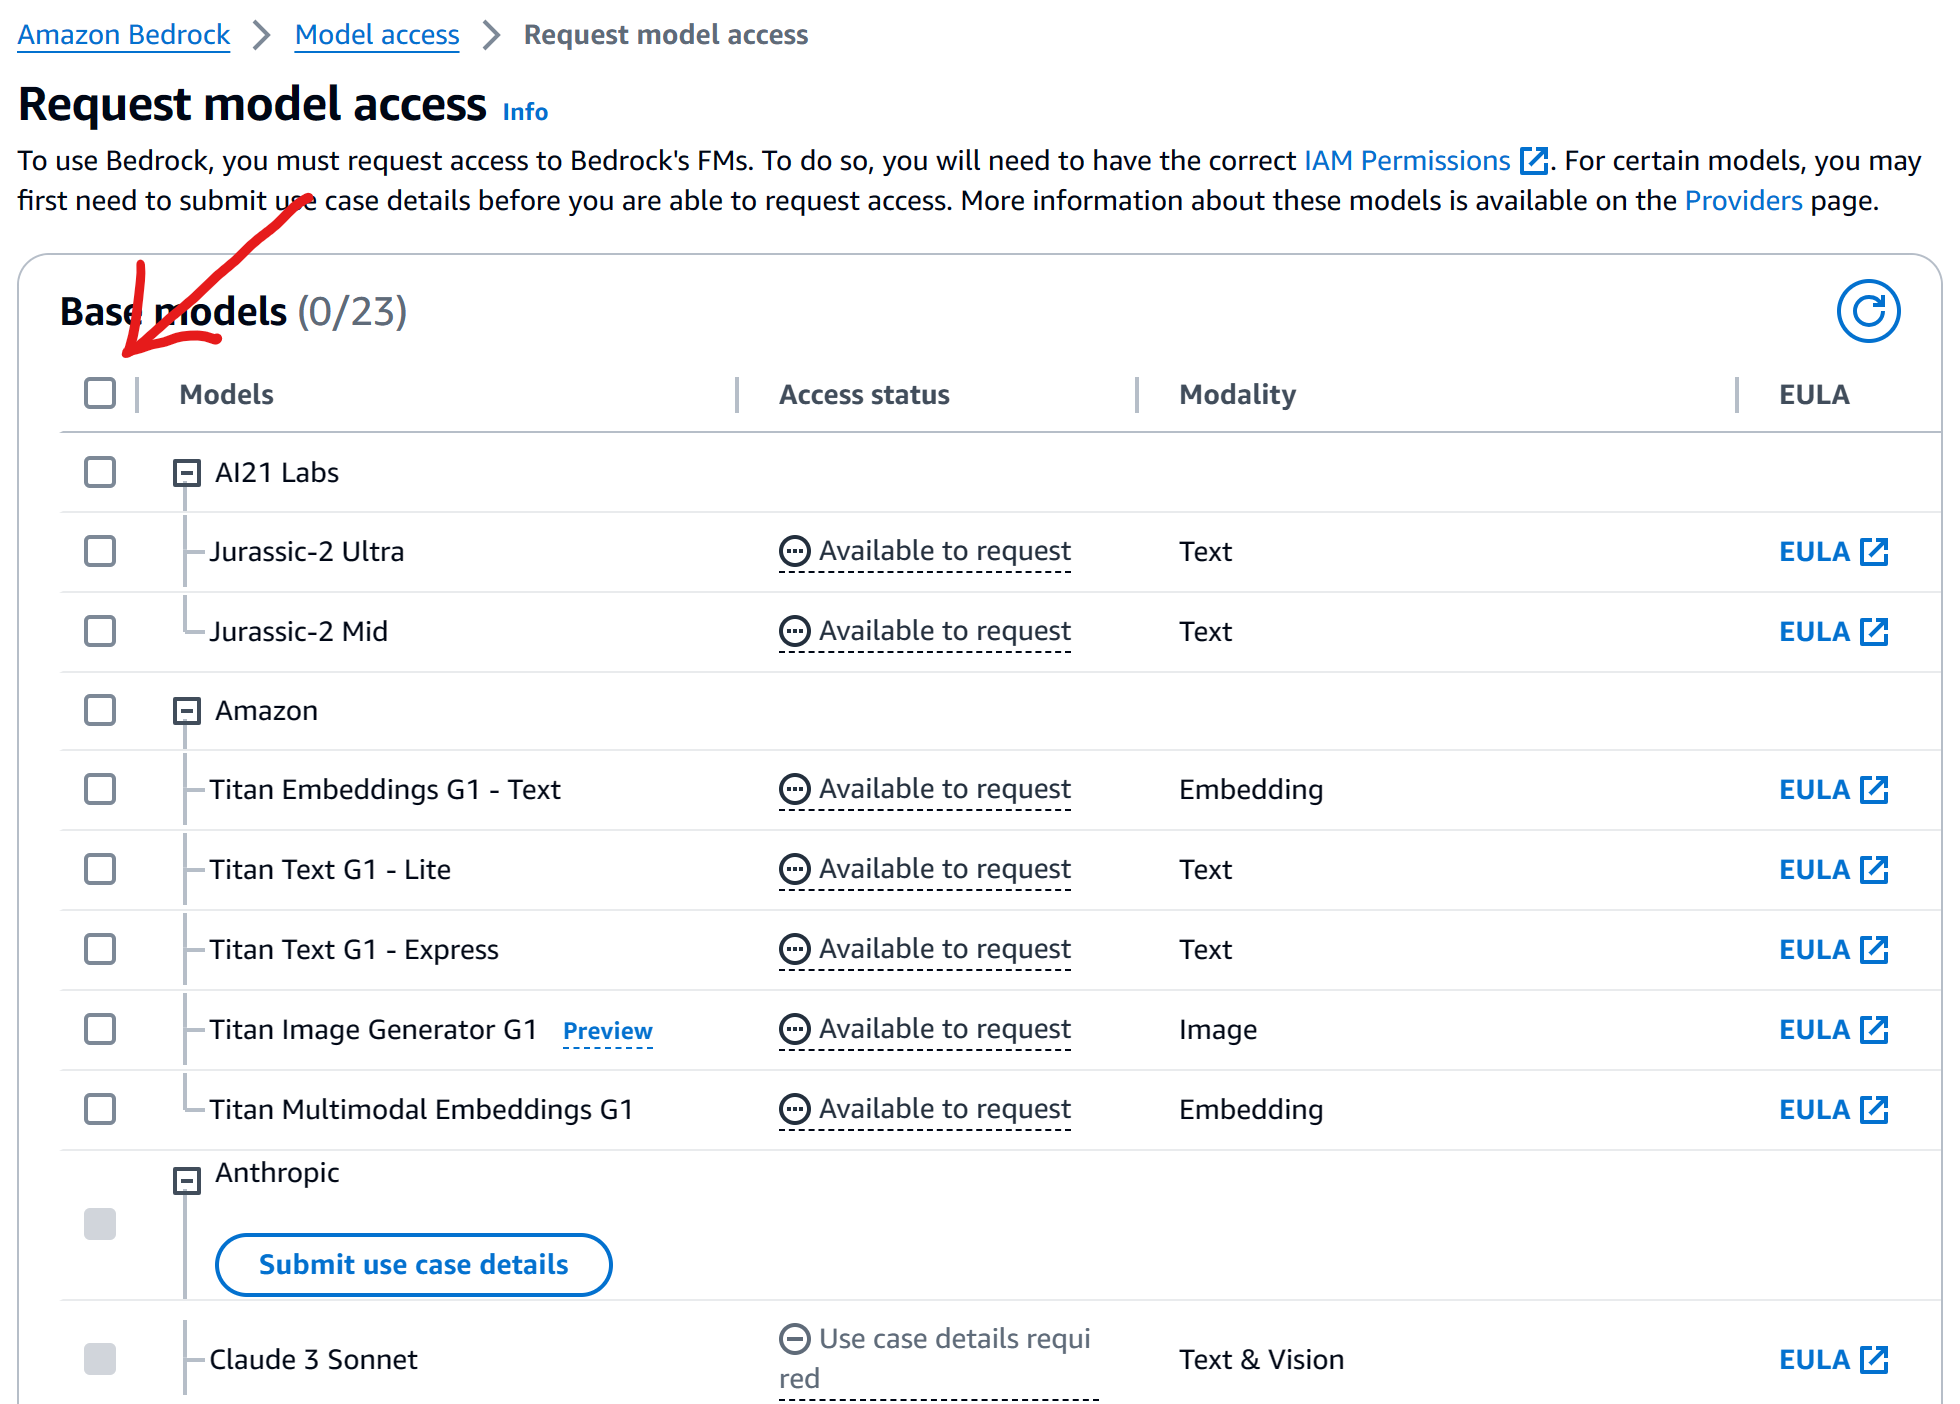 
 
 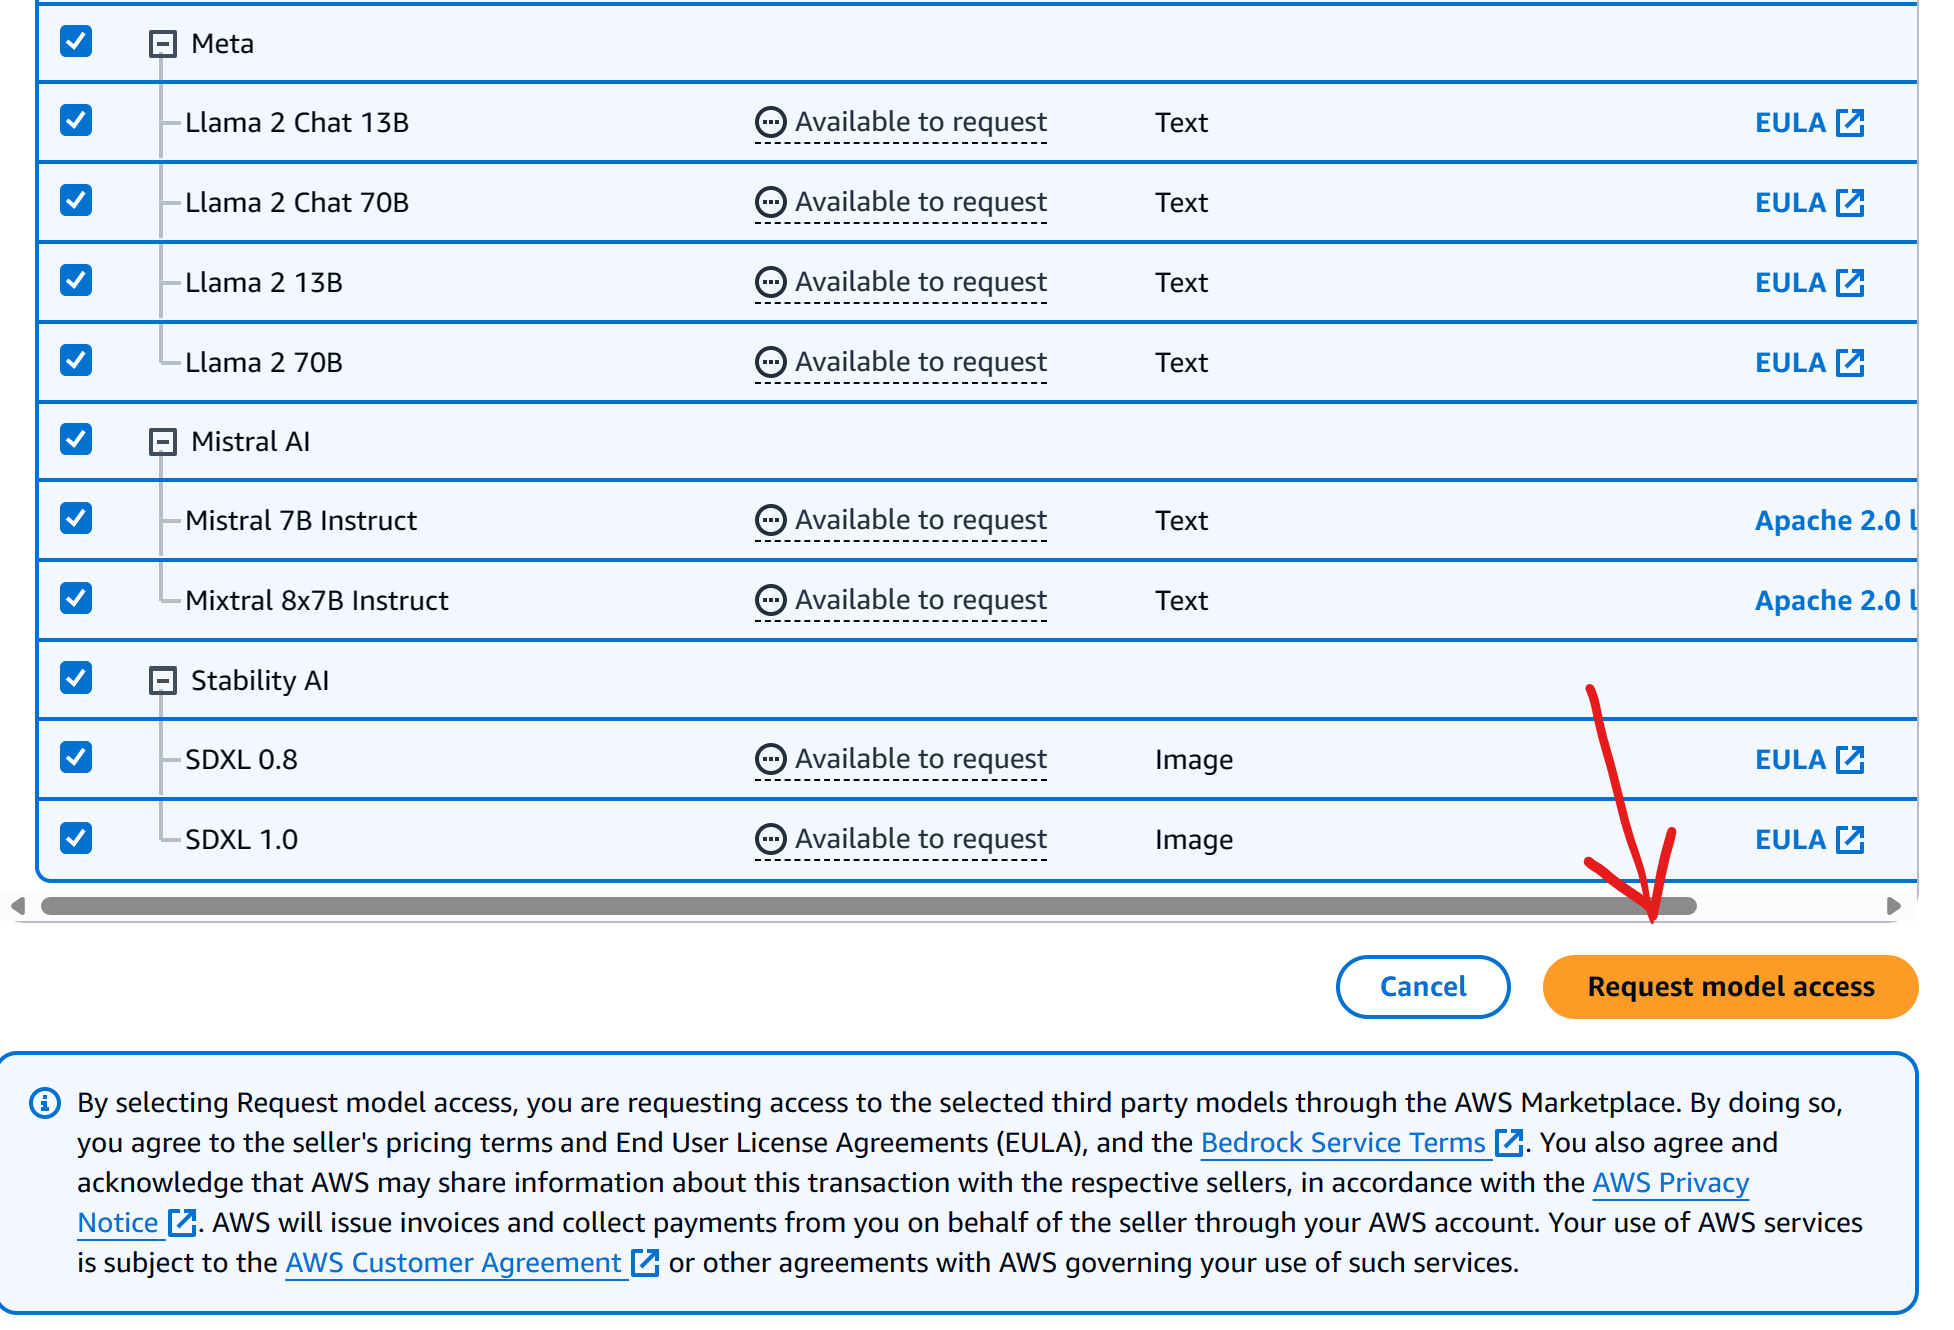

It will take a few minutes for the access to be granted. Once you have access to the models, you can proceed to the next step. 

## 2. Deployment 

We are going to deploy the chatbot using Cloud9 environment. The reason we are using Cloud9 evironment for deployment is because based on my personal experience, deploying it from your local machine's terminal or GitHub codespace terminal is prone to error and failed deployments. In some instances, the computer might run out of memory in the process of deployment or authentication issues might arise. The deployment in Cloud9 environment is moderately faster as well.

To proceed to the deployment, follow these steps:

1. open Cloud9 Service and click `Create Environment`

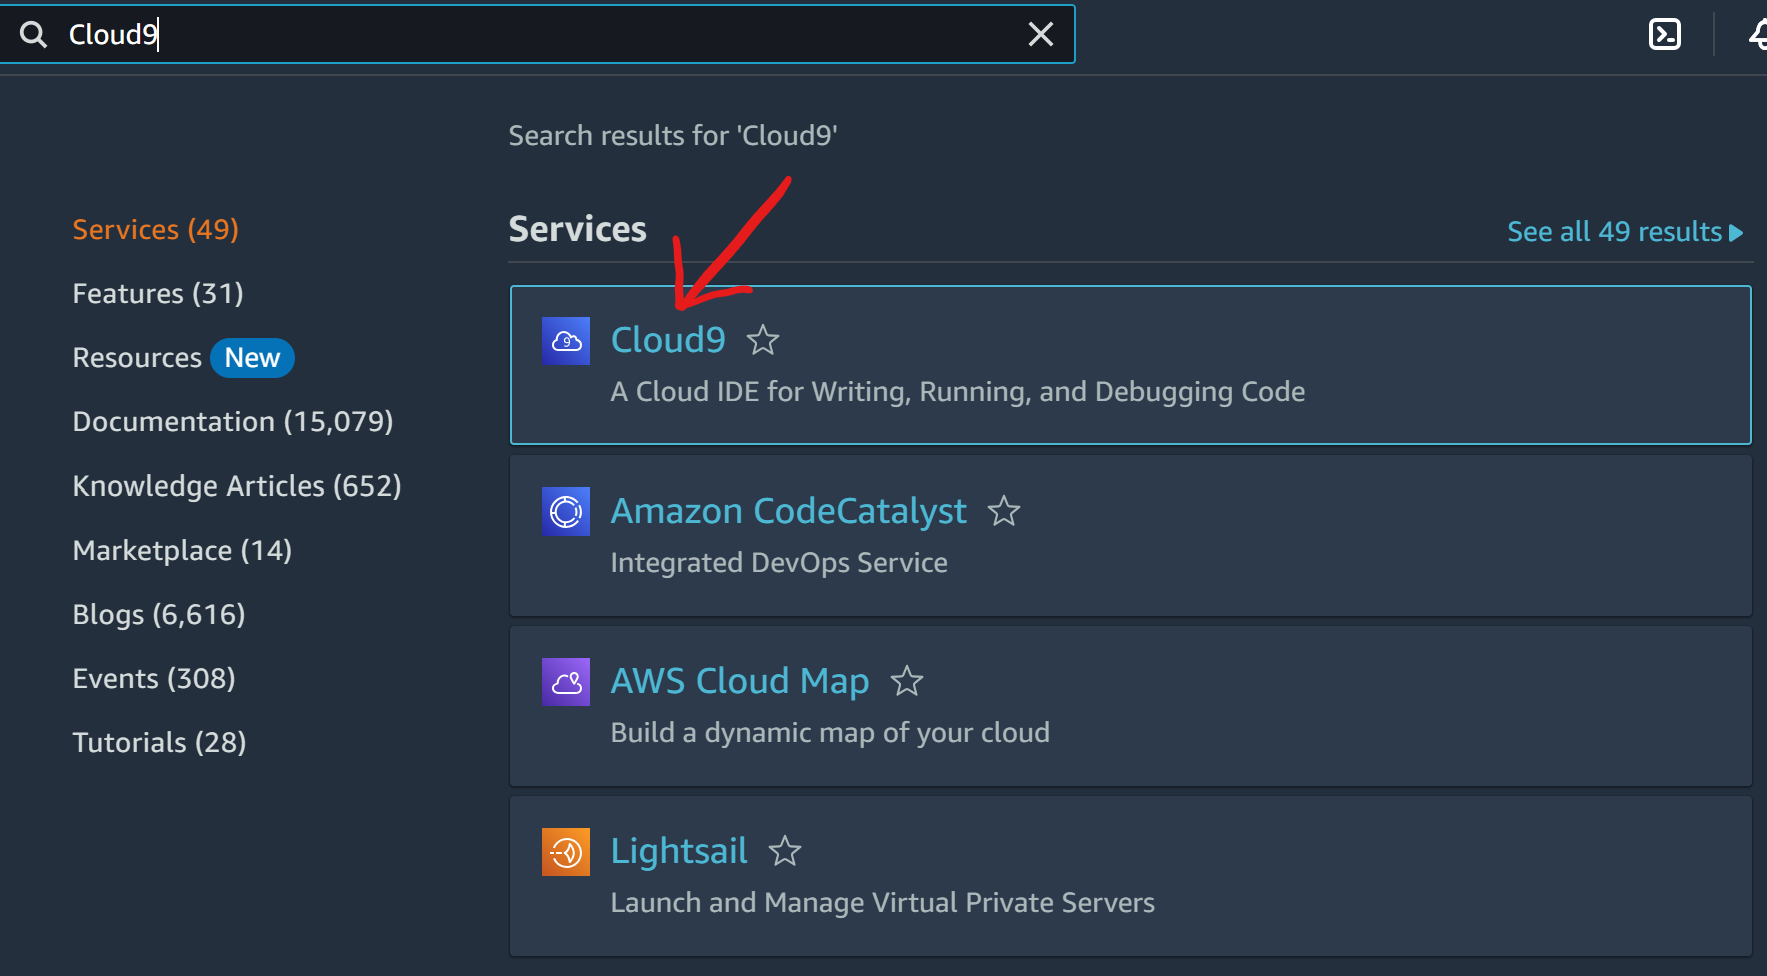

2. For clarity, name it `AWS GenAI Chatbot`

3. On 'New EC2 Instance' box, select `m5.large (8 GiB RAM + 2vCPU)` instance type.

4. For Platform, use `Ubuntu Server 22.04 LTS`. 

5. Scroll down and click `Create`.

Once created, you will see the enviroment named `AWS GenAI Chatbot`. Under Cloud9 IDE, click the link to take you to the environment and command shell. 

When you are in the command shell, follow the steps below:

1. Clone the Repository: Use the command `git clone https://github.com/aws-samples/aws-genai-llm-chatbot`.

2. Navigate to the repository with `cd aws-genai-llm-chatbot`.

3. Increase EBS Volume: Increase the instance's EBS volume to at least 100GB. This step is necessary since we are using Cloud9. Use the script 
`./scripts/cloud9-resize.sh`. You will be requested for two inputs. For the first input, enter `1`, and for the second input, enter `100`. 

4. Run `npm install && npm run build`. 

5. Enter `npm run create` and follow this structure. 

- Prefix to differentiate this deployment > `Press enter`
- Do you have access to Bedrock and want to enable it (Y/n)? > `y`
- Region where Bedrock is available > `us-east-1`
- Bedrock endpoint - leave as is for standard endpoint > `Press enter`
- Cross account role arn to invoke Bedrock - leave empty if Bedrock is in same account > `Press enter`
- Which Sagemaker LLMs do you want to enable (enter for none, space to select) > `Press enter`
- Do you want to enable RAG (Y/n) > `Y`
    - When asked for selecting a RAG engine, select `OpenSearch` by navigating to it, pressing `Space` and then pressing `Enter`. 

Once you followed the steps above, run this command:

`cdk bootstrap`

Now you can deploy the stack. If you follow every step as instructed, the deployment will take 30-40 minutes. Make sure you constantly monitor the terminal to make sure the deployment is having progress.

Run this command to start the deployment:

`npx cdk deploy`

When you are be prompted on whether you want to initiate the deployment, press `y`. You will be prompted a minute or so after you run the `npx cdk deploy`, so have an eye on the terminal when that prompt pops up. 

Once the deployment finishes, you will be given an Output that looks similar to this:

```
...
Outputs:
GenAIChatBotStack.UserInterfaceUserInterfaceDomanNameXXXXXXXX = dxxxxxxxxxxxxx.cloudfront.net
GenAIChatBotStack.AuthenticationUserPoolLinkXXXXX = https://xxxxx.console.aws.amazon.com/cognito/v2/idp/user-pools/xxxxx_XXXXX/users?region=xxxxx
GenAIChatBotStack.ApiKeysSecretNameXXXX = ApiKeysSecretName-xxxxxx
...
```

First, copy the link that starts with `GenAIChatBotStack.AuthenticationUserPoolLink` and paste it on your browser. On the page you will see an option `Add user`. Add a user by entering your email and a password.

Once the user is added, copy the link starting with `GenAIChatBotStack.UserInterfaceUserInterfaceDomanName` and login with the credentials you created the user. 

Once logged in, you now have access to the interface where you can test large language models and their performance with RAG.

The first step is to create a Workspace. Click on the `Dashboard` 

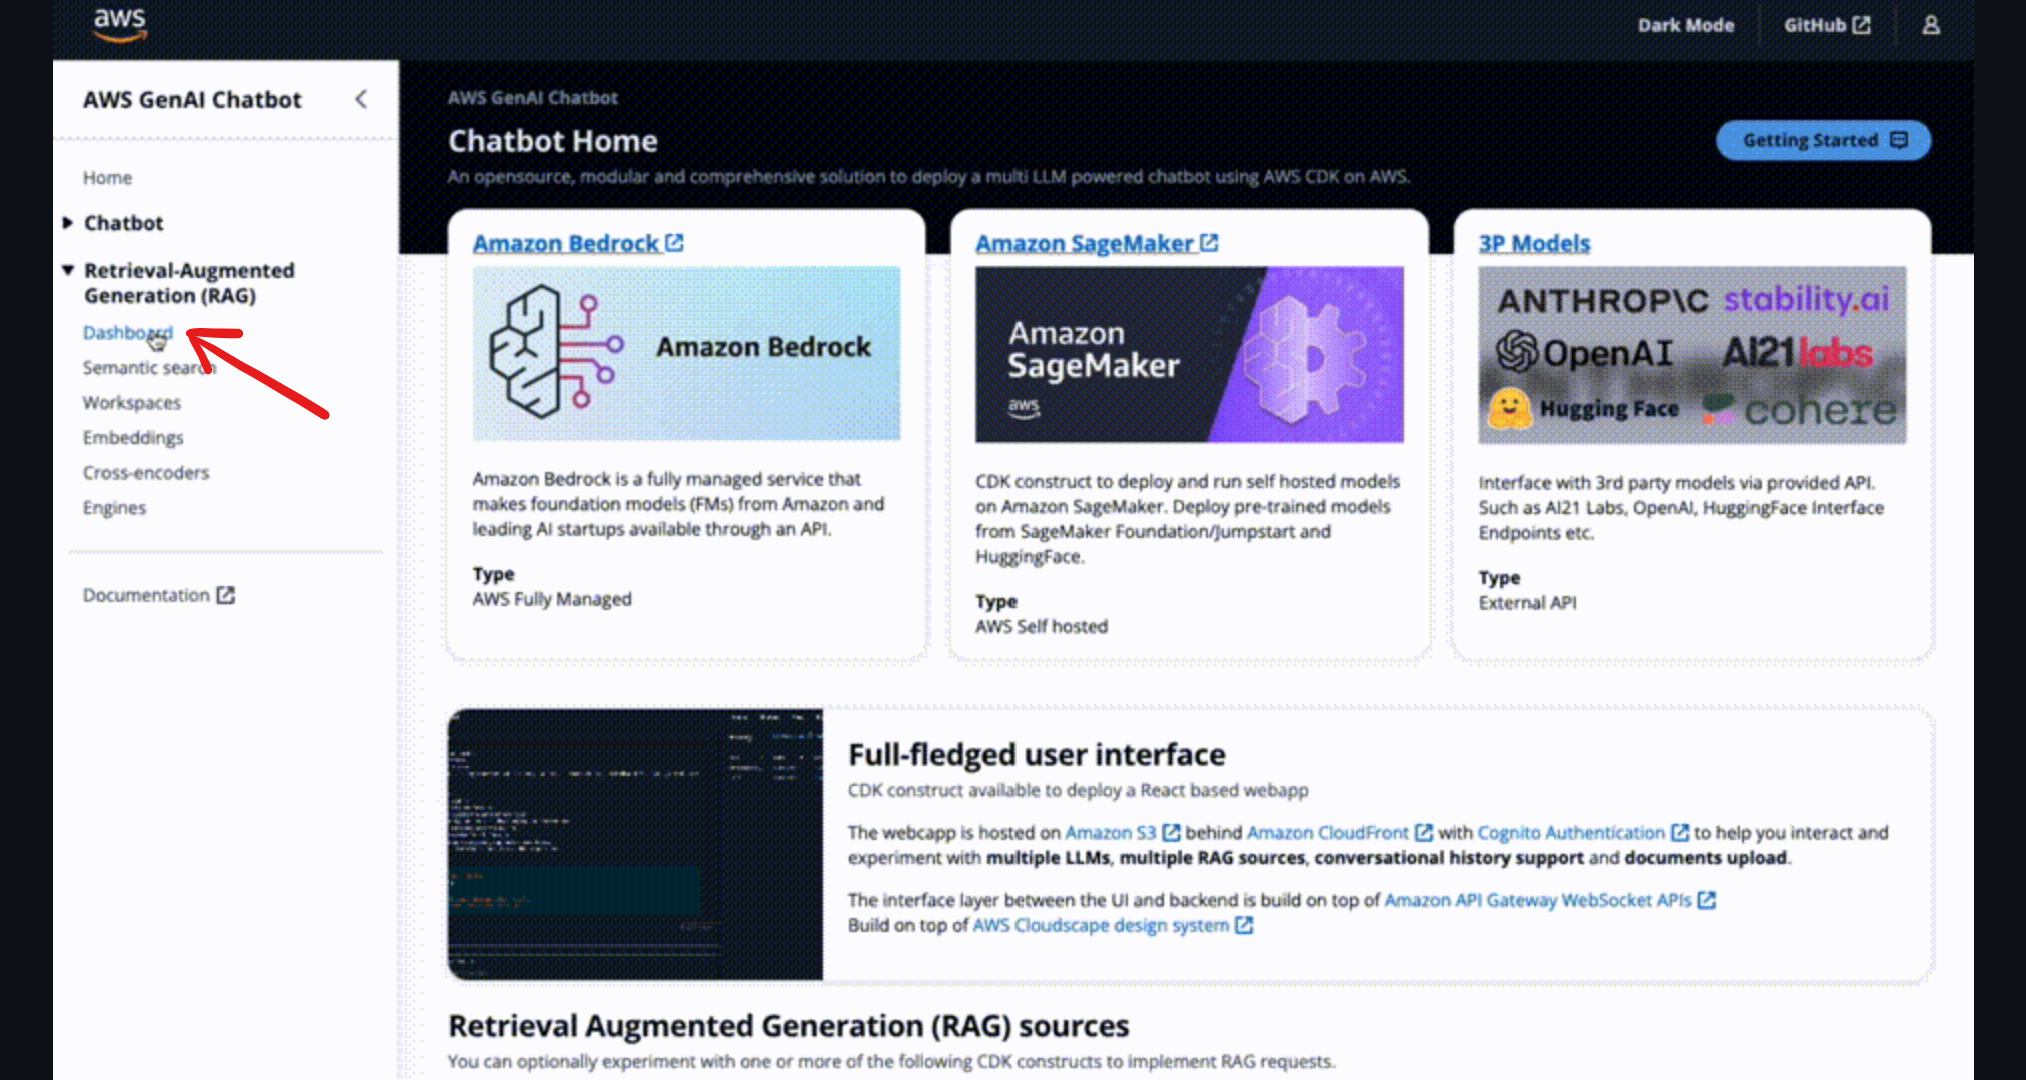



Then, click on `Create Workspace`. 

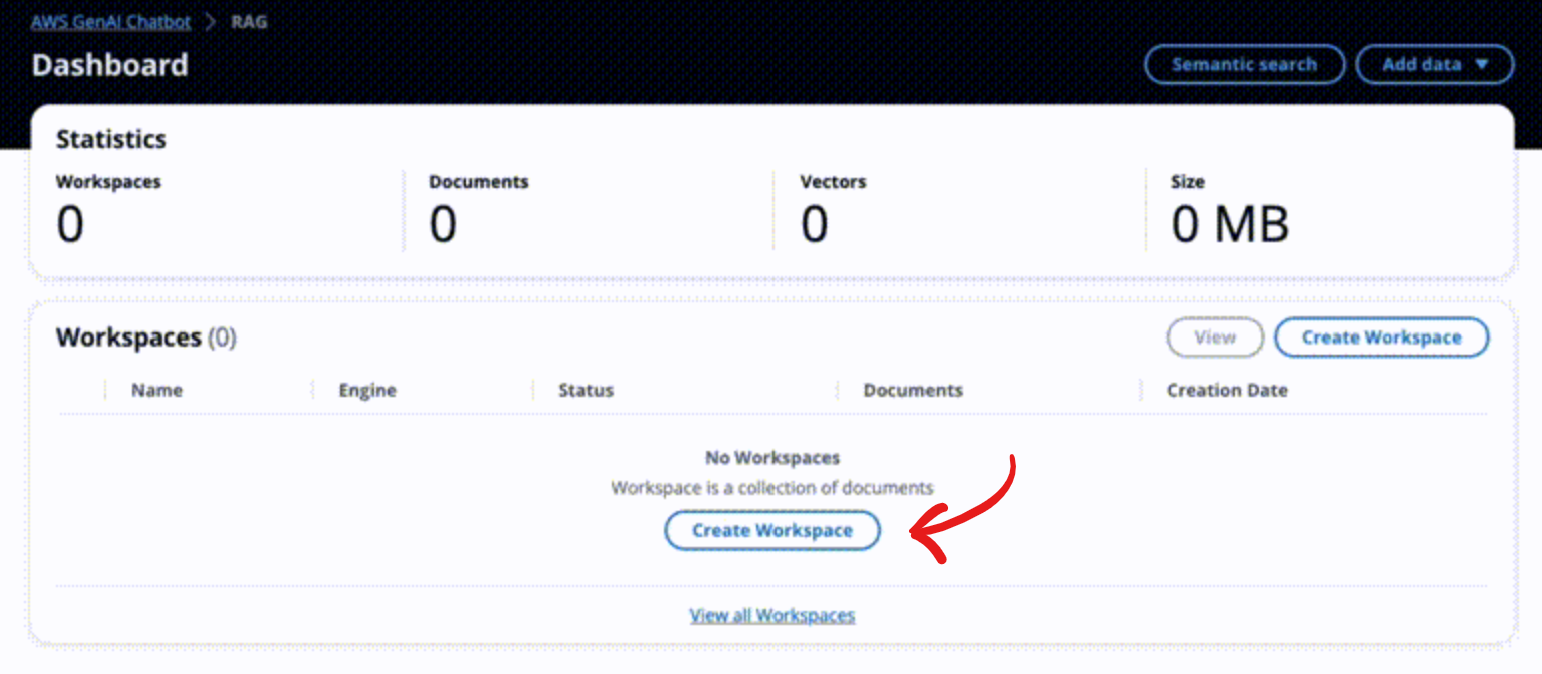

For engine, select `Amazon OpenSearch`. 

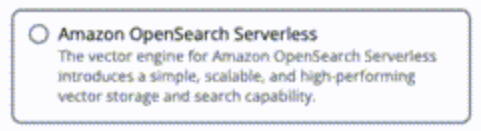

Name the workspace `KnowledgeBase`. Once the workspace is created and the status is `Ready`, you can click on the workspace and start uploading your documents that you want the knowledge to be retrieved from. 

Then, you can either go to the `Playground` to test one model with your knowledge, or you can go `Multi-chat playground` to test multiple models at the same time. Bear in mind that the more models you use and the more retrieval you do, the more it costs. 

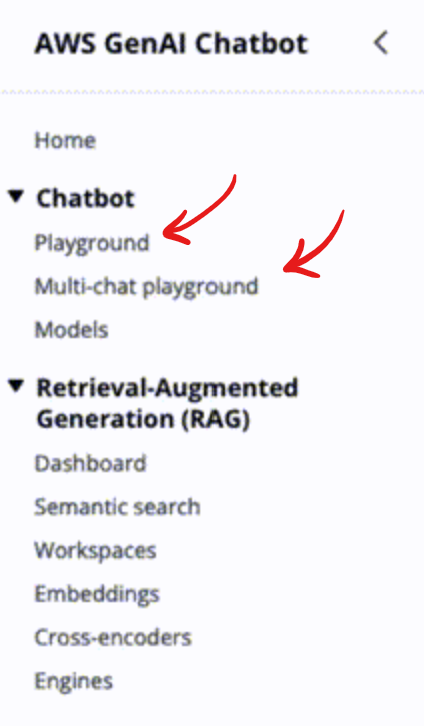

In both instances, make sure you don't forget selecting `KnowledgeBase` as your workspace, located under the input box.  

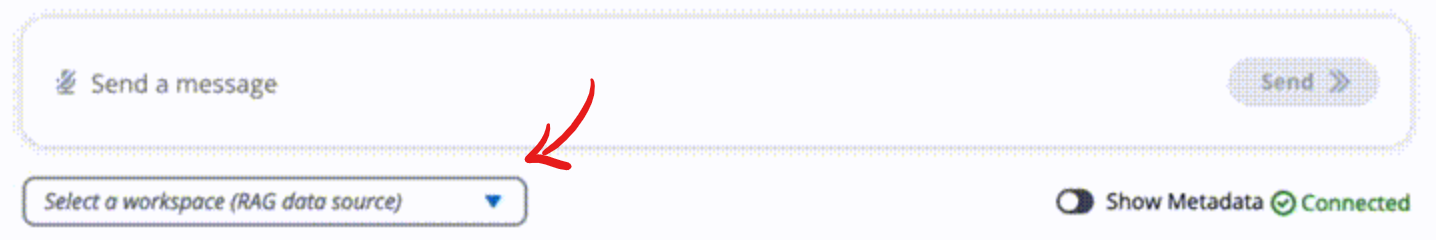

Once you are completely familiar with the process, you can then proceed to having multiple knowledge bases and testing them out. 

### 2.1 Deleting the Stack

Once you are done with testing the chatbot, make sure you delete the stack or the active resources will cost you. For the deletion process, all you have to do is to go back to your Cloud9 environments list and delete the `AWS GenAI Chatbot` environment you created in the beginning. Once it is successfully deleted, search for `CloudFormation` service on the search bar, open it, and make sure there is only one stack in there which will be `CDKToolkit` (CDKToolkit does not cost anything and is only there to facilitate the deployment of other stacks, so you do not need to delete it). If there are more stacks related to `AWS GenAI Chatbot`, make sure you delete the stack. Based on my experience, deleting the Cloud9 environment automatically deletes the stacks from `CloudFormation` as well, but still make sure you check `CloudFormation` in case there are active stacks other than `CDKToolkit`. Once you are done with deleting, that will be the end of your testing session with `AWS GenAI Chatbot`. 

## Tips on inputting the data:

Based on the experience I have in inputting the data and LLM response quality, there are a few considerations that I recommend when inputting the data to the knowledge base. First, I recommend inputting the data as text. The reason is if you input the data as a PDF, there can be issues with parsing the PDF which might result in poor retrievel and response quality. If you think the file is too large to be inputted as text, then PDF or DOCX will be fine. 

Also, if you wanted to input a website link in your knowledge base, make sure you input the specific page that has the information you need. Avoid putting the homepage or pages that does not contain relevant information. 

If you want more accuracy in LLM responses, inputting Q&A can be helpful. Although it might end up being a little time consuming, it will help with keeping the knowledge organized an on point. A good way of inputting Q&A is when you have edge cases that you think your data might not address properly. In that case, add that edge case as a question and then add the answer or solution to that edge case, so that when that case comes up, the knowledge can be retrieved and included in the response. 

Make sure you are careful when inputting the documents (PDF, DOCX, TEXT, and/or Q&A) in your workspace because as far as I know, they cannot be removed once they are added.

## 3. Difference between specific ways of deployment (and final notes):

I gained the experience with the deployment of this chatbot while working with [LessonLoop](https://lessonloop.org/about-us/), a startup working in EdTech industry.
I tried deploying this chatbot using my machine's terminal and GitHub Codespace environment, but ran into different types of issues related to Amazon OpenSearch engine selection, permission issues, authetication issues, and reaching RAM limit. The advantage of deploying using Cloud9 is that you will no more need to go through the layers of authentication since it is already inside your account. For example, you will not need to go through the whole process of putting in your account ID, Secret Key, and other specifications, which I believe reduces the risk of a failed deployment. 

Also, it helps with the termination of specific opearations on the stacks as well. When deployed with other environments, you will need to delete the active resources and the deletion for some resources might fail, and you will be charged without knowing it. In Cloud9 deployment, I personally have not ran into such a case. All of the resources successfully deleted without requiring me to trace them down and delete them one by one. However, it is highly recommended to recheck after the deletion to make sure there are no active instances. 

You might test the LLMs and RAG multiple times so make sure in every deployment process, you select the same region, commonly `us-east-1`. If you select multiple regions, you might run into issues like an instance running on a different region and charging you while you are unaware of it. This happened to our team. We noticed there is an instance charge although we made sure there are no instances active, but we found out the instance was active on `us-east-2` while we were working with `us-east-1`. 

If you felt stuck or overwhelmed by errors or constant failed deployments, feel free to drop me a line at hr328@cornell.edu. If my schedule allowed, I would be happy to help with the deployment and testing.

Have a great journey up ahead!